In [ ]:
# Import the required Libraries

In [44]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Connect to the Adventure Works database

In [46]:
conn = sqlite3.connect('adventure works new.db')

In [ ]:
# Define a function to run SQL queries and return DataFrame

In [48]:
def run_query(query): 
    return pd.read_sql_query(query,conn)

In [ ]:
# Query to get monthly sales data by product category

In [50]:
query = '''
SELECT CategoryName, OrderDate, SUM(OrderValue) AS TotalSales
FROM Demographics_update
GROUP BY CategoryName, OrderDate
ORDER BY OrderDate
'''
category_sales_data = run_query(query)
category_sales_data['OrderDate'] = pd.to_datetime(category_sales_data['OrderDate'])


In [ ]:
# Confirm dataframe is in the correct format

In [52]:
category_sales_data.head()

,CategoryName,OrderDate,TotalSales
0,Bikes,2015-01-01,8351.46
1,Bikes,2016-01-01,12276.97
2,Accessories,2017-01-01,1780.46
3,Bikes,2017-01-01,23322.94
4,Clothing,2017-01-01,577.37


In [54]:
print(category_sales_data)

     CategoryName  OrderDate  TotalSales
0           Bikes 2015-01-01     8351.46
1           Bikes 2016-01-01    12276.97
2     Accessories 2017-01-01     1780.46
3           Bikes 2017-01-01    23322.94
4        Clothing 2017-01-01      577.37
...           ...        ...         ...
1636     Clothing 2016-09-08     1339.89
1637        Bikes 2015-09-09    15850.04
1638  Accessories 2016-09-09     2717.25
1639        Bikes 2016-09-09    33511.98
1640     Clothing 2016-09-09     1373.74

[1641 rows x 3 columns]


In [ ]:
# Create new column for 'Month'

In [88]:
category_sales_data['Month'] = category_sales_data['OrderDate'].dt.strftime('%B')

In [92]:
print(category_sales_data)

     CategoryName  OrderDate  TotalSales      Month      Year-Month
0           Bikes 2015-01-01     8351.46    January    2015-January
1           Bikes 2016-01-01    12276.97    January    2016-January
2     Accessories 2017-01-01     1780.46    January    2017-January
3           Bikes 2017-01-01    23322.94    January    2017-January
4        Clothing 2017-01-01      577.37    January    2017-January
...           ...        ...         ...        ...             ...
1636     Clothing 2016-09-08     1339.89  September  2016-September
1637        Bikes 2015-09-09    15850.04  September  2015-September
1638  Accessories 2016-09-09     2717.25  September  2016-September
1639        Bikes 2016-09-09    33511.98  September  2016-September
1640     Clothing 2016-09-09     1373.74  September  2016-September

[1641 rows x 5 columns]


In [ ]:
# Define order of month for proper sorting

In [120]:
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

In [ ]:
# Convert 'Month' to categorical with ordered months

In [122]:
category_sales_data['Month'] = pd.Categorical(
    category_sales_data['Month'], categories=month_order, ordered=True
)


In [ ]:
# Group DataFrame by 'Month'

In [126]:
category_sales = category_sales_data.groupby(['Month', 'CategoryName'])['TotalSales'].sum().reset_index()

C:\Users\Okorigwe Clinton\AppData\Local\Temp\ipykernel_12532\3837012027.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = category_sales_data.groupby(['Month', 'CategoryName'])['TotalSales'].sum().reset_index()


In [ ]:
# Sort DataFrame by 'Month'

In [128]:
category_sales = category_sales.sort_values('Month')

In [130]:
print(category_sales.head())

      Month CategoryName  TotalSales
0   January  Accessories    78354.87
1   January        Bikes  2180876.41
2   January     Clothing    32885.63
3  February  Accessories    75540.16
4  February        Bikes  2238875.06


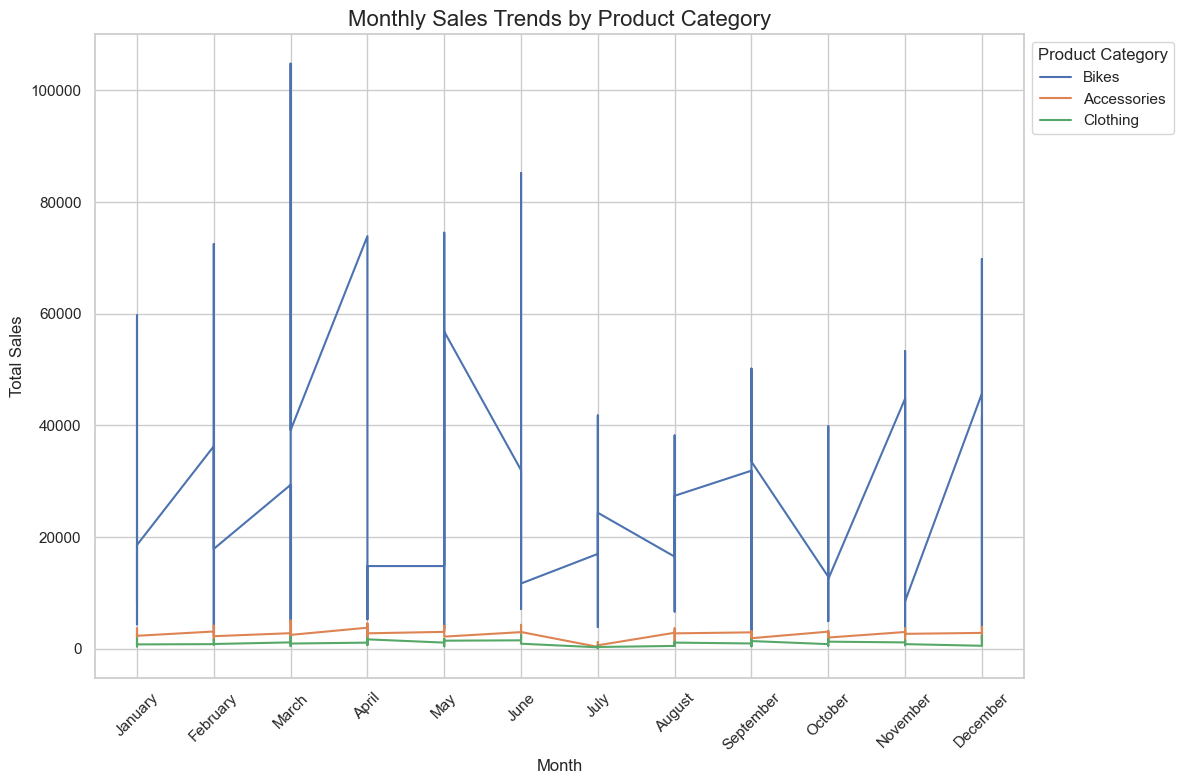

In [152]:
# Define the order of the months
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

# Convert 'Month' column to a Categorical type with the defined order
category_sales_data['Month'] = pd.Categorical(
    category_sales_data['Month'], categories=month_order, ordered=True
)

# Sort the data by 'Month' to ensure the order is correct
category_sales_data = category_sales_data.sort_values('Month')

# Create the plot
plt.figure(figsize=(12, 8))
for category in category_sales_data['CategoryName'].unique():
    subset = category_sales_data[category_sales_data['CategoryName'] == category]
    plt.plot(subset['Month'], subset['TotalSales'], label=category)

# Add titles and labels
plt.title('Monthly Sales Trends by Product Category', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Display the legend
plt.legend(title='Product Category', loc='upper left', bbox_to_anchor=(1, 1))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Plot bar chart to better make sense of data

C:\Users\Okorigwe Clinton\AppData\Local\Temp\ipykernel_12532\2276004332.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  category_pivot = category_sales_data.pivot_table(values='TotalSales', index='Month', columns='CategoryName', aggfunc='sum')


<Figure size 1200x800 with 0 Axes>

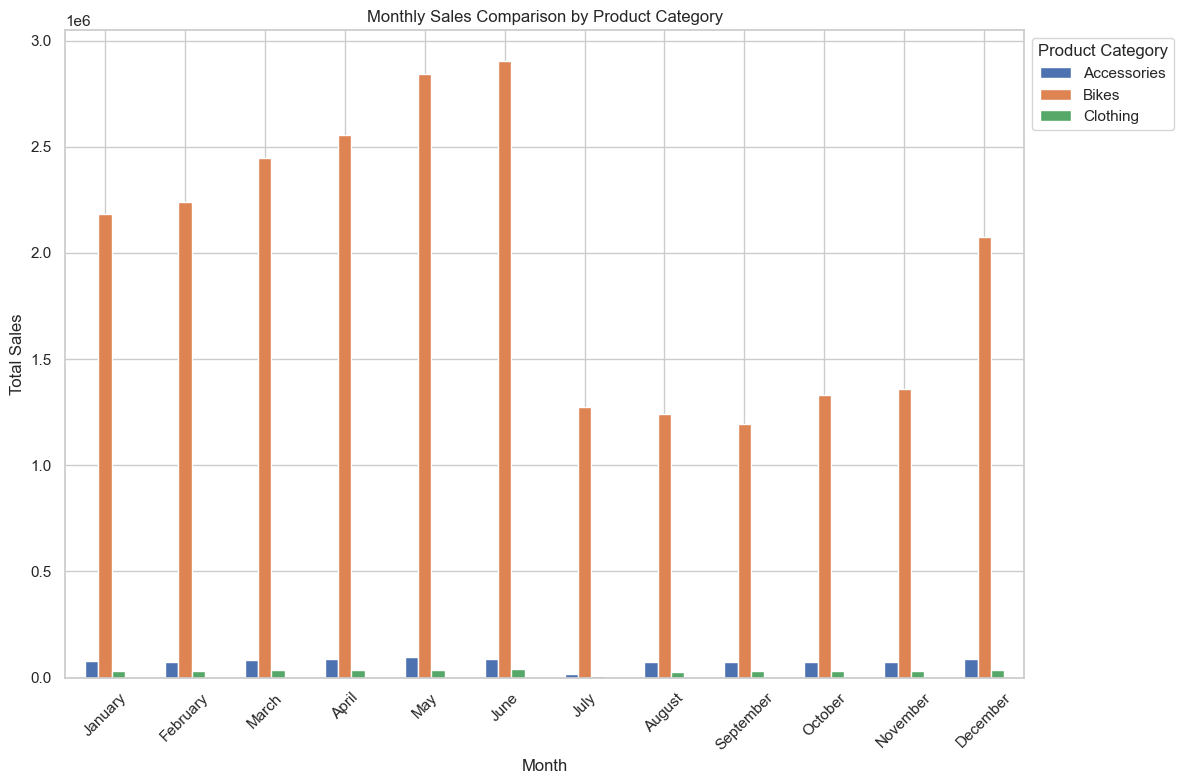

In [134]:
plt.figure(figsize=(12, 8))
category_pivot = category_sales_data.pivot_table(values='TotalSales', index='Month', columns='CategoryName', aggfunc='sum')
category_pivot.plot(kind='bar', figsize=(12, 8))
plt.title('Monthly Sales Comparison by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf


In [ ]:
# Perform time series decompostiton for a selscted category for 'Bikes'

In [156]:
category = 'Bikes'
category_data = category_sales_data[category_sales_data['CategoryName'] == category].set_index('Month')
decompose_result = seasonal_decompose(category_data['TotalSales'], model='additive', period=12)


In [ ]:
# Plot decomposition results

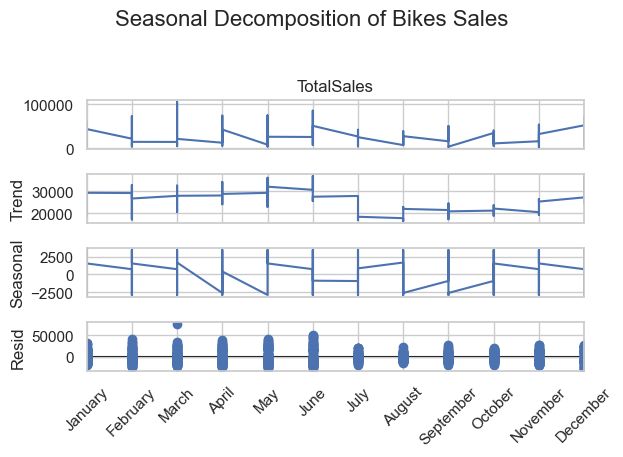

In [158]:
decompose_result.plot()
plt.suptitle(f'Seasonal Decomposition of {category} Sales', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [ ]:
# Perform time series decompostiton for a selscted category for 'Clothing'

In [164]:
category = 'Clothing'
category_data = category_sales_data[category_sales_data['CategoryName'] == category].set_index('Month')
decompose_result = seasonal_decompose(category_data['TotalSales'], model='additive', period=12)


In [ ]:
# Plot decomposition results

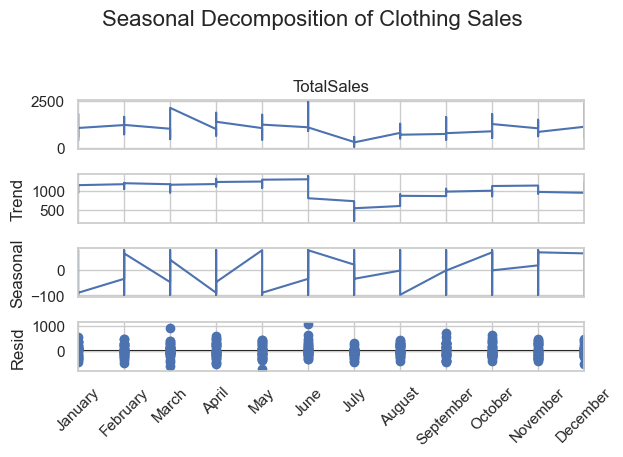

In [166]:
decompose_result.plot()
plt.suptitle(f'Seasonal Decomposition of {category} Sales', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [ ]:
# Perform time series decompostiton for a selscted category for 'Clothing'

In [170]:
category = 'Accessories'
category_data = category_sales_data[category_sales_data['CategoryName'] == category].set_index('Month')
decompose_result = seasonal_decompose(category_data['TotalSales'], model='additive', period=12)


In [ ]:
# Plot decomposition results

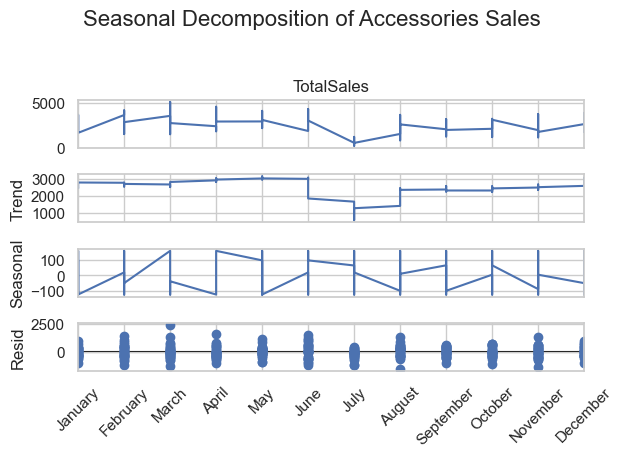

In [172]:
decompose_result.plot()
plt.suptitle(f'Seasonal Decomposition of {category} Sales', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [ ]:
# Time series regression analysis to test sesonal effect

In [178]:

model = smf.ols('TotalSales ~ C(Month)', data=category_sales_data[category_sales_data['CategoryName'] == category]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSales   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     46.47
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           5.96e-62
Time:                        23:01:43   Log-Likelihood:                -2796.3
No. Observations:                 365   AIC:                             5617.
Df Residuals:                     353   BIC:                             5663.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2527.57

In [ ]:
# Close connection

In [180]:
conn.close()